In [37]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.animation as animation
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import LinearSegmentedColormap


In [2]:
sub='01'

In [3]:
activation_path = f'/Users/hazimiasad/Documents/Work/megan/code/playground/RL-Diffusion/results/activations/sub-{sub}/epoch_4.npy'
activation = np.load(activation_path)

In [4]:
save_path = f'/Users/hazimiasad/Documents/Work/megan/code/playground/RL-Diffusion/results/Imgs/sub-{sub}/rdm/'

In [5]:
activations = activation[0, :, :]

In [6]:
rdm = squareform(pdist(activations, metric='correlation'))

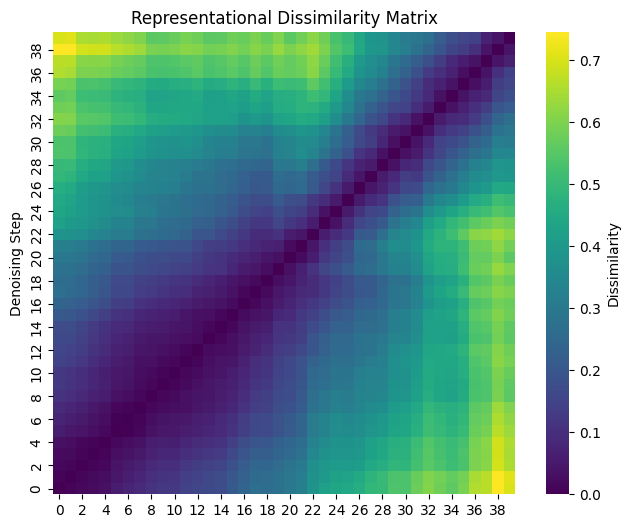

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(rdm, cmap='viridis', square=True, cbar_kws={'label': 'Dissimilarity'})
plt.title('Representational Dissimilarity Matrix')
plt.gca().invert_yaxis()
plt.ylabel('Denoising Step')
# plt.savefig(save_path + 'gradient_rdm_single_trial_steps.pdf')
plt.show()

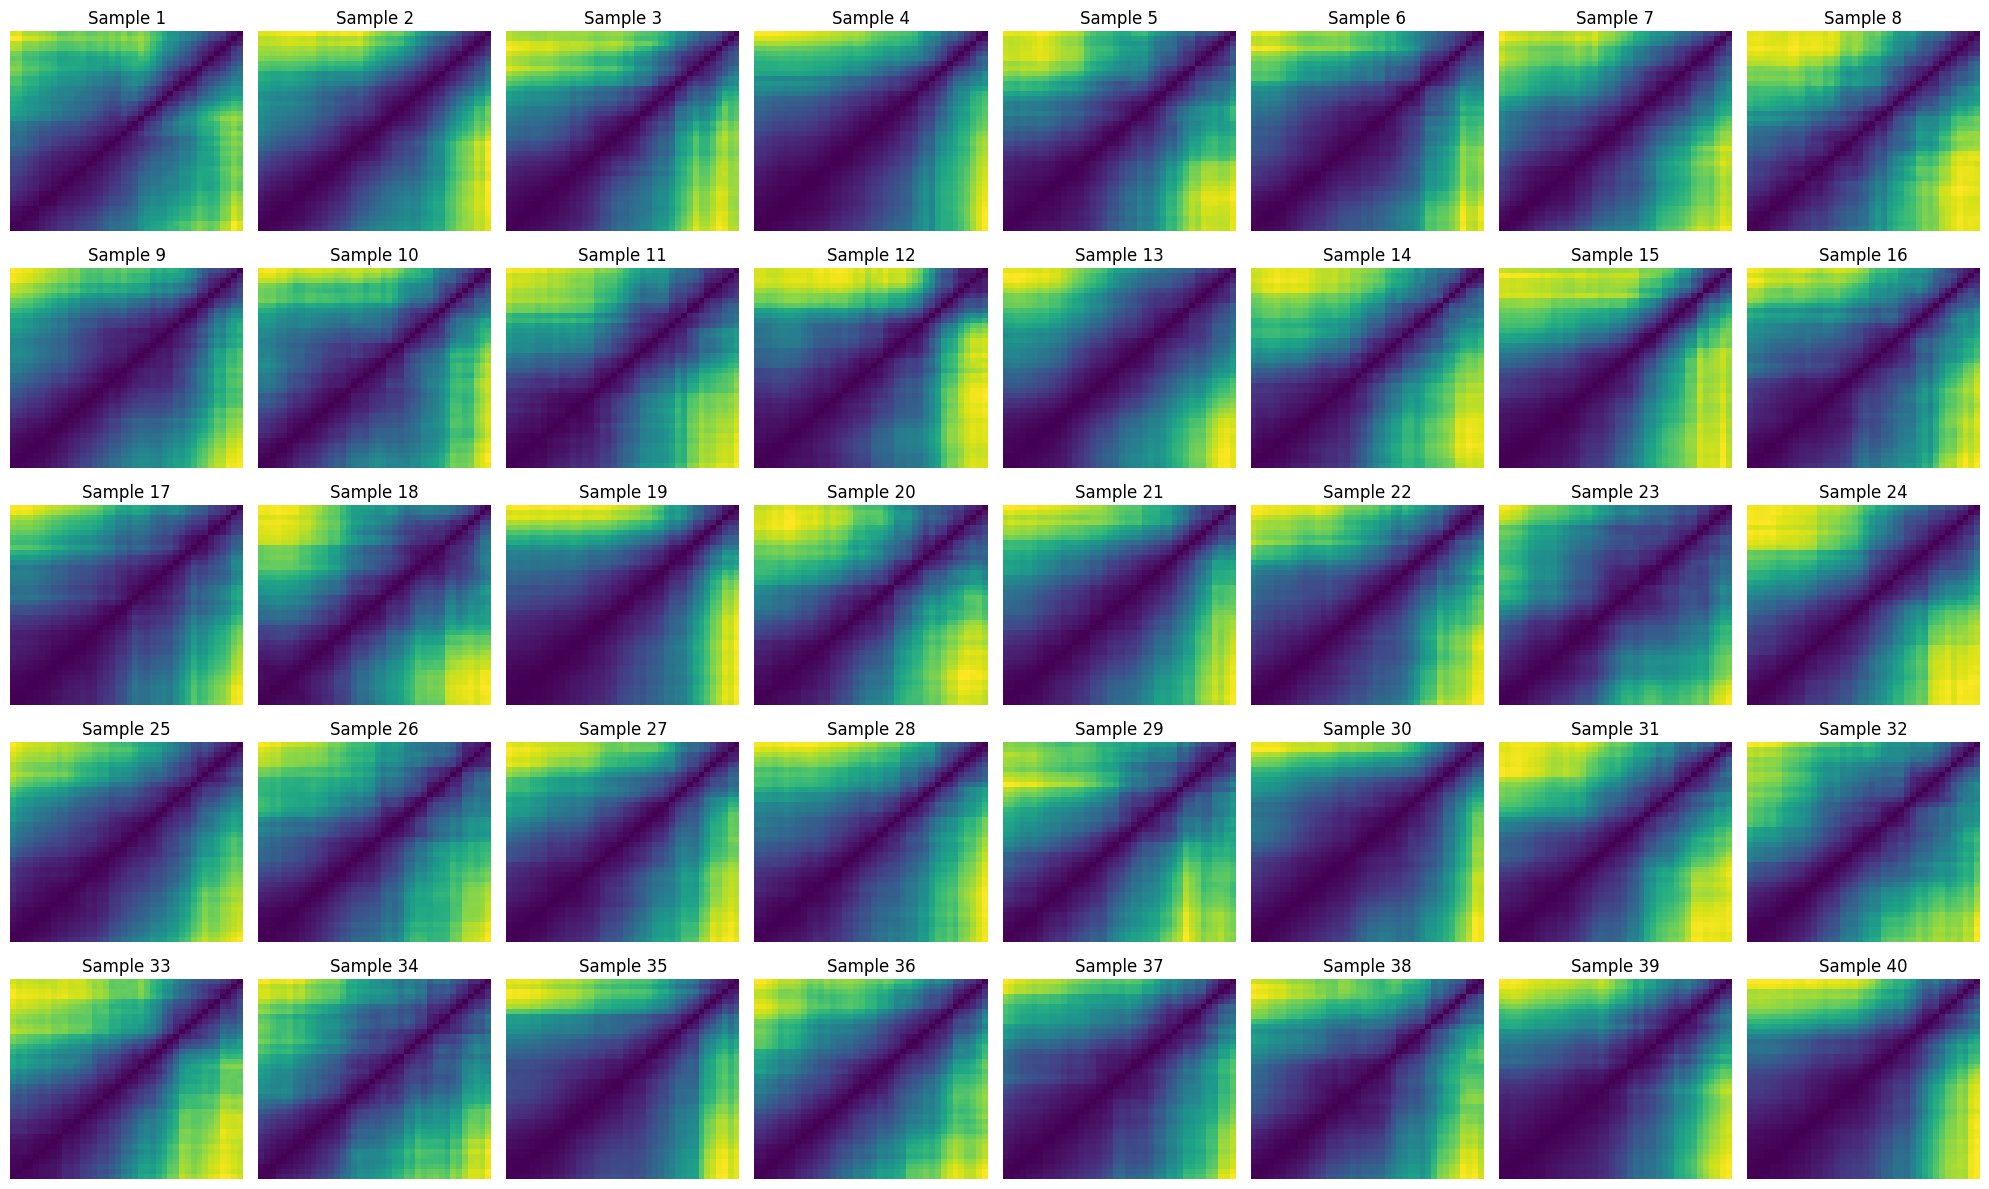

In [25]:
steps = 40  # Number of denoising steps
fig, axes = plt.subplots(5, 8, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    # Load or compute your activations for step i; assume shape (n_samples, 128)
    activations = activation[i, :, :]
    rdm = squareform(pdist(activations, metric='correlation'))
    
    sns.heatmap(rdm, cmap='viridis', ax=ax, cbar=False)
    ax.set_title(f'Sample {i+1}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()

plt.tight_layout()
# plt.savefig(save_path + 'gradient_rdm_40_trials_steps.pdf')
plt.show()

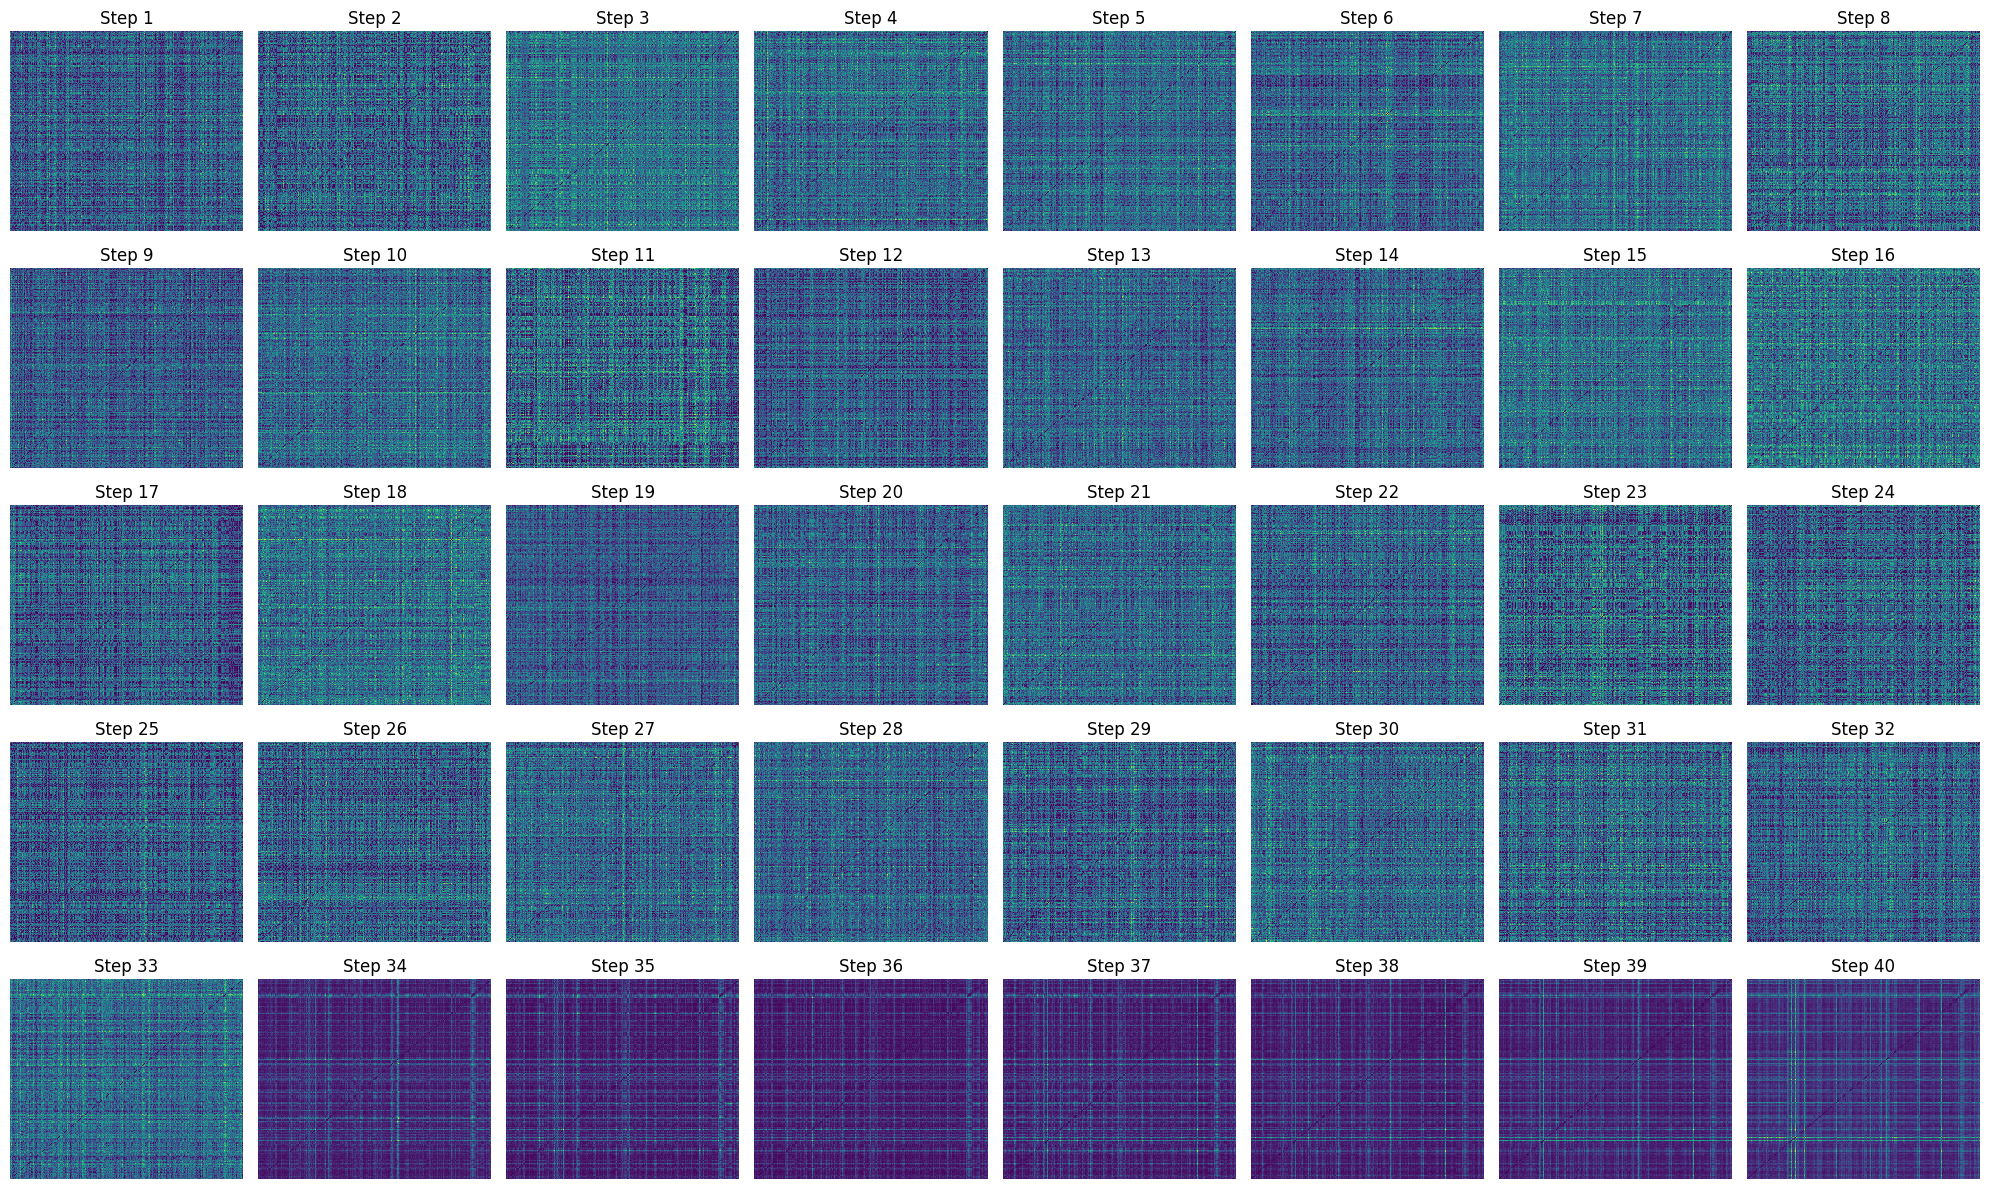

In [10]:
steps = 40  # Number of denoising steps
fig, axes = plt.subplots(5, 8, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    # Load or compute your activations for step i; assume shape (n_samples, 128)
    activations = activation[:, i, :]
    rdm = squareform(pdist(activations, metric='correlation'))
    
    sns.heatmap(rdm, cmap='viridis', ax=ax, cbar=False)
    ax.set_title(f'Step {i+1}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()

plt.tight_layout()
# plt.savefig(save_path + 'RL_rdm_all_trials_40_steps.pdf', dpi=100)
plt.show()

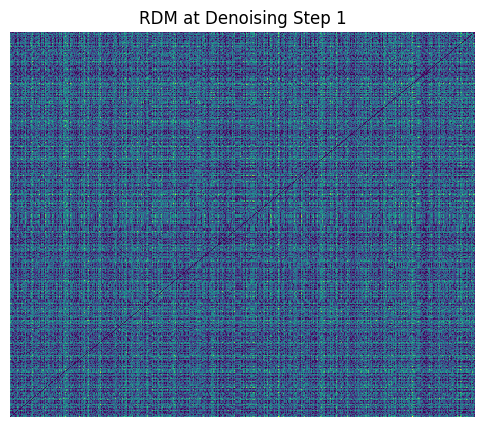

In [11]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(6, 5))

def animate(i):
    ax.clear()
    activations = activation[:, i, :]
    rdm = squareform(pdist(activations, metric='correlation'))
    sns.heatmap(rdm, cmap='viridis', ax=ax, cbar=False)
    ax.set_title(f'RDM at Denoising Step {i+1}')
    ax.set_xticks([])
    # plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    ax.set_yticks([])
    ax.invert_yaxis()

anim = animation.FuncAnimation(fig, animate, frames=40, interval=500)
fps = 8
anim.save(save_path+f'rdm_animation_{fps}.gif', writer='pillow', fps=fps)

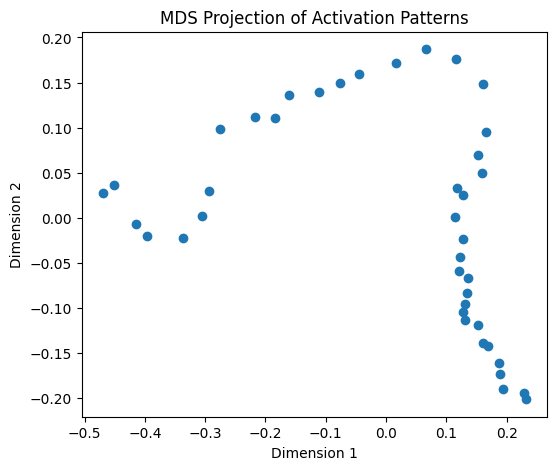

In [8]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
embedding = mds.fit_transform(rdm)
plt.figure(figsize=(6, 5))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('MDS Projection of Activation Patterns')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

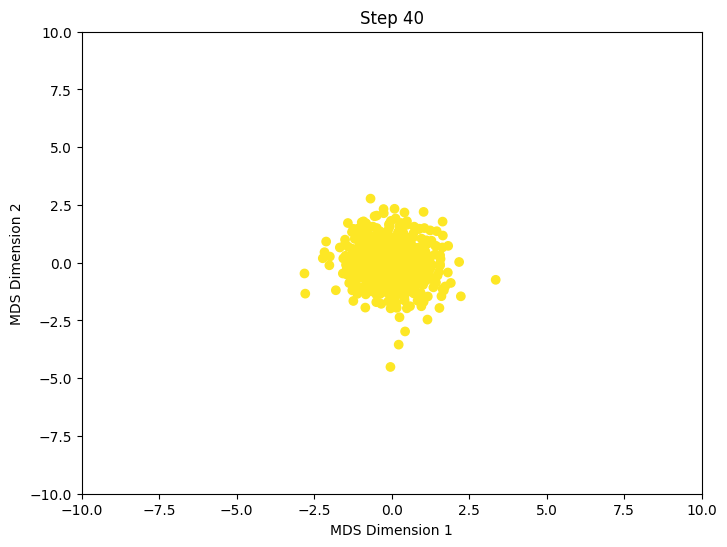

In [27]:
# Number of animation frames (steps) and number of samples (for demonstration)
steps = 40
n_samples = len(activation[:, 0, :])
latent_dim = 128

# For demonstration, we simulate evolving latent activations.
# In your case, replace this with loading your saved activations (e.g., np.load('activations_step_{i}.npy'))
activations_over_steps = []
np.random.seed(42)
for i in range(steps):
    # Simulate activations that slowly shift over time.
    activations = activation[:, i, :]#np.random.randn(n_samples, latent_dim) + i * 0.1
    activations_over_steps.append(activations)

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))
# scat = ax.scatter([], [])
colors = plt.cm.viridis(np.linspace(0, n_samples, n_samples))
scat = ax.scatter(np.zeros(n_samples), np.zeros(n_samples), c=colors)

# Optionally set static axis labels
ax.set_xlabel("MDS Dimension 1")
ax.set_ylabel("MDS Dimension 2")

def init():
    """Initialize the plot."""
    ax.set_title("Step 0")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    return scat,

def update(frame):
    """Update the scatter plot for frame 'frame'."""
    # Get activations for the current step
    activations = activations_over_steps[frame]
    
    # Compute the Representational Dissimilarity Matrix (RDM)
    # Here, we use Euclidean distance, but you can use other metrics (like 'correlation')
    rdm = squareform(pdist(activations, metric='euclidean'))
    
    # Use MDS to project the RDM into a 2D space
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    embedding = mds.fit_transform(rdm)
    
    # Update scatter plot data
    scat.set_offsets(embedding)
    
    # Update the title for the current step
    ax.set_title(f"Step {frame+1}")
    
    # Optionally, adjust axes limits if the points move a lot
    ax.relim()
    ax.autoscale_view()
    
    return scat,

# Create the animation object with unique colors for each dot


ani = animation.FuncAnimation(fig, update, frames=steps, init_func=init,
                              blit=False, interval=500)

# Save the animation as an MP4 video file
# Ensure you have FFmpeg installed and accessible in your PATH.
fps = 8
ani.save(f"2d_plot_animation_fps_{fps}.gif", writer="pillow", fps=fps)

# To display the animation in an interactive window, uncomment the next line:
plt.show()

In [8]:
# Number of animation frames (steps) and number of samples (for demonstration)
steps = 40
n_samples = len(activation[:, 0, :])
latent_dim = 128

# For demonstration, we simulate evolving latent activations.
# In your case, replace this with loading your saved activations (e.g., np.load('activations_step_{i}.npy'))
activations_over_steps = []
np.random.seed(42)
for i in range(steps):
    # Simulate activations that slowly shift over time.
    activations = activation[:, i, :]#np.random.randn(n_samples, latent_dim) + i * 0.1
    activations_over_steps.append(activations)

In [11]:
embds_over_steps = []
for frame in range(40):
    
    activations = activations_over_steps[frame]
    rdm = squareform(pdist(activations, metric='euclidean'))
    
    # Use MDS to project the RDM into a 2D space
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    embedding = mds.fit_transform(rdm)
    embds_over_steps.append(embedding)

In [23]:
def give_row (i):
    return np.array([emb[i] for emb in embds_over_steps])


In [24]:
first_rows = give_row(0)
second_rows = give_row(1)

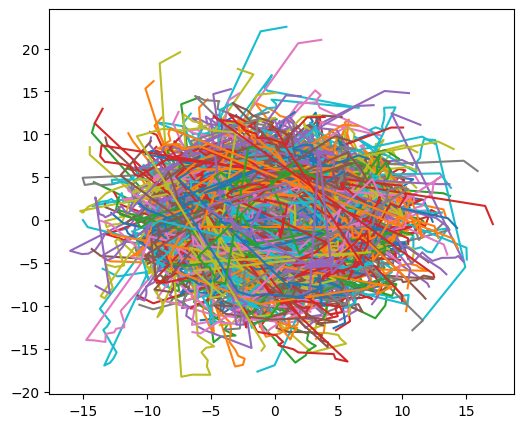

In [29]:
plt.figure(figsize=(6, 5))
for i in range(len(embds_over_steps[0])):
    rows = give_row(i)
    # plt.scatter(rows[:, 0], rows[:, 1])
    plt.plot(rows[:, 0], rows[:, 1],  linestyle='-' )
    # plt.plot(second_rows[:, 0], second_rows[:, 1], marker='o', linestyle='-', color='r', label='Second Rows')
    # plt.legend()
    # plt.scatter(second_rows[:, 0], second_rows[:, 1])

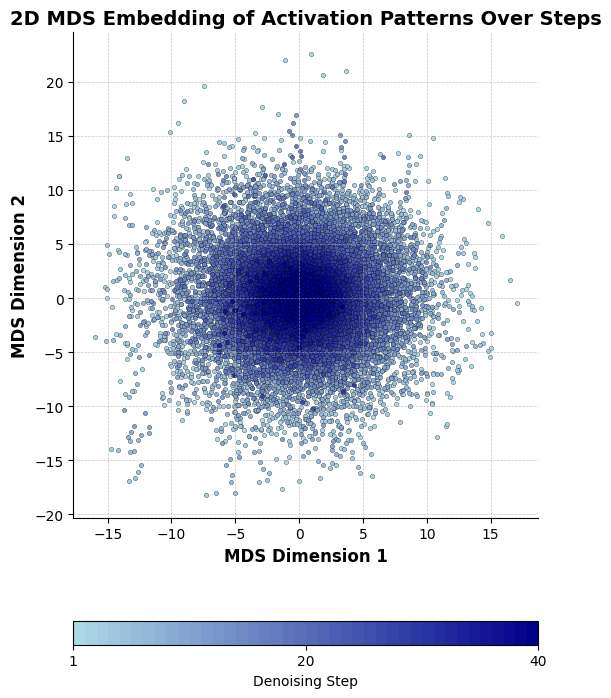

In [73]:
fig, ax = plt.subplots(figsize=(6, 9))

colors = ['#ADD8E6',  '#00008B']  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list('custom_gradient', colors, N=40)

for i in range(len(embds_over_steps)):
    cols = embds_over_steps[i]
    ax.scatter(cols[:, 0], cols[:, 1], color=cmap(i), label=f'Step {i+1}', s=10, edgecolors='k', linewidth=0.2)

sm = plt.cm.ScalarMappable(cmap=cmap)

cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', label='Denoising Step')

# Set custom tick positions and labels

cbar.set_ticks([0,  .5,  1])  # Set tick positions
cbar.set_ticklabels(['1', '20', '40']) 

ax.set_title('2D MDS Embedding of Activation Patterns Over Steps', fontsize=14, weight='bold')
ax.set_xlabel('MDS Dimension 1', fontsize=12, weight='bold')
ax.set_ylabel('MDS Dimension 2', fontsize=12, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)


plt.show()


In [41]:
cmap(40)

(1.0, 0.3137254901960784, 0.3137254901960784, 1.0)